## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [2]:
df = pd.read_csv("data/PuneHouseData.csv")
df.head(10)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
5,Super built-up Area,Ready To Move,2 BHK,DuenaTa,1170,2.0,1.0,38.00,Balaji Nagar
6,Super built-up Area,18-May,4 BHK,Jaades,2732,4.0,NaN,204.00,Baner
7,Super built-up Area,Ready To Move,4 BHK,Brway G,3300,4.0,NaN,600.00,Baner road
8,Super built-up Area,Ready To Move,3 BHK,NaN,1310,3.0,1.0,63.25,Bhandarkar Road
9,Plot Area,Ready To Move,6 Bedroom,NaN,1020,6.0,NaN,370.00,Bhavani Peth


## EDA

In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price', 'site_location'],
      dtype='object')

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.dtypes

area_type         object
availability      object
size              object
society           object
total_sqft        object
bath             float64
balcony          float64
price            float64
site_location     object
dtype: object

In [7]:
df.society.value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [8]:
df.site_location.value_counts()

Alandi Road            139
Kalyani Nagar          139
Mahatma Gandhi Road    139
Lulla Nagar            139
Laxmi Road             139
                      ... 
Sadashiv Peth          138
Raviwar Peth           138
Rasta Peth             138
Ghorpadi               138
other                    1
Name: site_location, Length: 97, dtype: int64

In [9]:
df.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

## Data preprocessing and handling missing data

In [10]:
df1 = df.drop(["area_type","availability","society"], axis=1)

In [11]:
df1.isnull().sum()

size              16
total_sqft         0
bath              73
balcony          609
price              0
site_location      1
dtype: int64

In [12]:
df1.head(10)

,size,total_sqft,bath,balcony,price,site_location
0,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,3 BHK,1521,3.0,1.0,95.00,Aundh
4,2 BHK,1200,2.0,1.0,51.00,Aundh Road
5,2 BHK,1170,2.0,1.0,38.00,Balaji Nagar
6,4 BHK,2732,4.0,NaN,204.00,Baner
7,4 BHK,3300,4.0,NaN,600.00,Baner road
8,3 BHK,1310,3.0,1.0,63.25,Bhandarkar Road
9,6 Bedroom,1020,6.0,NaN,370.00,Bhavani Peth


In [13]:
# Filling the null values of bath with the median value of the entire dataset
import math
median_bath = math.floor(df1.bath.median())
df1.bath = df1.bath.fillna(median_bath)

In [14]:
# Assuming that null value of balcony means 0 balcony in the house
df1.balcony = df1.balcony.fillna('0')

In [15]:
df2 = df1.dropna()

In [16]:
df2['Bedrooms'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Image\AppData\Local\Temp\ipykernel_6728\1166185864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Bedrooms'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [17]:
df2.head(10)

,size,total_sqft,bath,balcony,price,site_location,Bedrooms
0,2 BHK,1056,2.0,1.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,3.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,1.0,95.00,Aundh,3
4,2 BHK,1200,2.0,1.0,51.00,Aundh Road,2
5,2 BHK,1170,2.0,1.0,38.00,Balaji Nagar,2
6,4 BHK,2732,4.0,0,204.00,Baner,4
7,4 BHK,3300,4.0,0,600.00,Baner road,4
8,3 BHK,1310,3.0,1.0,63.25,Bhandarkar Road,3
9,6 Bedroom,1020,6.0,0,370.00,Bhavani Peth,6


In [18]:
df2.shape

(13303, 7)

In [19]:
df3 = df2.drop('size', axis=1)
df3.head()

,total_sqft,bath,balcony,price,site_location,Bedrooms
0,1056,2.0,1.0,39.07,Alandi Road,2
1,2600,5.0,3.0,120.00,Ambegaon Budruk,4
2,1440,2.0,3.0,62.00,Anandnagar,3
3,1521,3.0,1.0,95.00,Aundh,3
4,1200,2.0,1.0,51.00,Aundh Road,2


In [20]:
df3.Bedrooms.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [21]:
df3.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [22]:
df3.site_location.unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner road',
       'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi',
       'Dhayari Phata', 'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind',
       'Ghorpade Peth', 'other', 'Gokhale Nagar', 'Gultekdi',
       'Guruwar peth', 'Hadapsar', 'Hadapsar Industrial Estate',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj', 'Khadaki',
       'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony', 'Mukund Nagar',
       '

In [23]:
df3.balcony.unique()

array([1.0, 3.0, '0', 2.0, 0.0], dtype=object)

In [24]:
df3['balcony'] = df3['balcony'].astype(float) 
df3.balcony.unique()

array([1., 3., 0., 2.])

In [76]:
df3.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [26]:
def average_sqft(x):
    a = x.split('-')
    if len(a) == 2:
        return (float(a[0].strip())+float(a[1].strip()))/2
    try:
        return float(x)
    except:
        return None

In [27]:
df3['total_sqft'] = df3['total_sqft'].apply(average_sqft)
df3

,total_sqft,bath,balcony,price,site_location,Bedrooms
0,1056.0,2.0,1.0,39.07,Alandi Road,2
1,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4
2,1440.0,2.0,3.0,62.00,Anandnagar,3
3,1521.0,3.0,1.0,95.00,Aundh,3
4,1200.0,2.0,1.0,51.00,Aundh Road,2
...,...,...,...,...,...,...
13315,3453.0,4.0,0.0,231.00,Pashan,5
13316,3600.0,5.0,0.0,400.00,Paud Road,4
13317,1141.0,2.0,1.0,60.00,Pirangut,2
13318,4689.0,4.0,1.0,488.00,Prabhat Road,4


In [28]:
df3.shape

(13303, 6)

In [29]:
df3.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [30]:
df3.price.unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [31]:
df3 = df3.dropna()

In [32]:
df3.isnull().sum()

total_sqft       0
bath             0
balcony          0
price            0
site_location    0
Bedrooms         0
dtype: int64

# Feature Engineering

In [33]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,total_sqft,bath,balcony,price,site_location,Bedrooms,price_per_sqft
0,1056.0,2.0,1.0,39.07,Alandi Road,2,3699.810606
1,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4,4615.384615
2,1440.0,2.0,3.0,62.00,Anandnagar,3,4305.555556
3,1521.0,3.0,1.0,95.00,Aundh,3,6245.890861
4,1200.0,2.0,1.0,51.00,Aundh Road,2,4250.000000


In [34]:
df4.site_location

0                 Alandi Road
1             Ambegaon Budruk
2                  Anandnagar
3                       Aundh
4                  Aundh Road
                 ...         
13315                  Pashan
13316               Paud Road
13317                Pirangut
13318            Prabhat Road
13319    Pune Railway Station
Name: site_location, Length: 13257, dtype: object

In [35]:
df4.location = df4.site_location.apply(lambda x: x.strip())
location_stats =df4['site_location'].value_counts(ascending=False)
location_stats

C:\Users\Image\AppData\Local\Temp\ipykernel_6728\2373589631.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df4.location = df4.site_location.apply(lambda x: x.strip())


Mangalwar peth          139
Khadaki                 139
Kondhwa                 139
Narayan Peth            139
Pune Railway Station    139
                       ... 
Nagar Road              136
Fatima Nagar            136
Wakadewadi              136
Warje                   136
other                     1
Name: site_location, Length: 97, dtype: int64

In [36]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

other    1
Name: site_location, dtype: int64

In [37]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

97

In [38]:
df4.head(10)

,total_sqft,bath,balcony,price,site_location,Bedrooms,price_per_sqft
0,1056.0,2.0,1.0,39.07,Alandi Road,2,3699.810606
1,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4,4615.384615
2,1440.0,2.0,3.0,62.00,Anandnagar,3,4305.555556
3,1521.0,3.0,1.0,95.00,Aundh,3,6245.890861
4,1200.0,2.0,1.0,51.00,Aundh Road,2,4250.000000
5,1170.0,2.0,1.0,38.00,Balaji Nagar,2,3247.863248
6,2732.0,4.0,0.0,204.00,Baner,4,7467.057101
7,3300.0,4.0,0.0,600.00,Baner road,4,18181.818182
8,1310.0,3.0,1.0,63.25,Bhandarkar Road,3,4828.244275
9,1020.0,6.0,0.0,370.00,Bhavani Peth,6,36274.509804


#### Further improve the model by maintaining uniformity in the site_location. For eg: Aundh and Aundh Road mean the same thing. Baner and Baner road are the same site_location.

# Outlier Removal

Based on business logic

In [39]:
df4[df4.total_sqft/df4.Bedrooms<300].head(10)

,total_sqft,bath,balcony,price,site_location,Bedrooms,price_per_sqft
9,1020.0,6.0,0.0,370.0,Bhavani Peth,6,36274.509804
45,600.0,9.0,0.0,200.0,Kondhwa Budruk,8,33333.333333
58,1407.0,4.0,1.0,150.0,Mundhawa,6,10660.980810
68,1350.0,7.0,0.0,85.0,Pirangut,8,6296.296296
70,500.0,3.0,2.0,100.0,Pune Railway Station,3,20000.000000
78,460.0,1.0,0.0,22.0,Senapati Bapat Road,2,4782.608696
89,710.0,6.0,3.0,160.0,Viman Nagar,6,22535.211268
119,276.0,3.0,3.0,23.0,Fatima Nagar,2,8333.333333
129,950.0,7.0,0.0,115.0,Hadapsar Industrial Estate,7,12105.263158
149,1034.0,5.0,0.0,185.0,Mangalwar peth,6,17891.682785


In [40]:
df4.shape

(13257, 7)

In [41]:
df5 = df4[~(df4.total_sqft/df4.Bedrooms<300)]
df5.shape

(12513, 7)

Based on standard deviation and mean

In [42]:
df5.price_per_sqft.describe()

count     12513.000000
mean       6307.567166
std        4160.879784
min         267.829813
25%        4211.469534
50%        5295.138889
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [43]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(10937, 7)

In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('site_location'):
        global bhk_stats
        bhk_stats = {}
        for Bedrooms, bhk_df in location_df.groupby('Bedrooms'):
            bhk_stats[Bedrooms] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for Bedrooms, bhk_df in location_df.groupby('Bedrooms'):
            stats = bhk_stats.get(Bedrooms-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
# df8 = df7.copy()
df7.shape

(7459, 7)

In [45]:
bhk_stats

{1: {'mean': 5101.860565345225, 'std': 1574.9456912922271, 'count': 9},
 2: {'mean': 5017.996768670127, 'std': 1263.4744464198877, 'count': 57},
 3: {'mean': 5507.2093063432985, 'std': 1574.379979996744, 'count': 45},
 4: {'mean': 6570.275214143422, 'std': 1226.9799889063286, 'count': 5},
 5: {'mean': 6011.980460854774, 'std': 3252.039644639861, 'count': 5},
 6: {'mean': 2802.857142857143, 'std': 482.8571428571429, 'count': 2},
 7: {'mean': 5925.925925925926, 'std': 0.0, 'count': 1},
 8: {'mean': 3666.6666666666665, 'std': 0.0, 'count': 1}}

In [46]:
bhk_stats.get(2)

{'mean': 5017.996768670127, 'std': 1263.4744464198877, 'count': 57}

It is unusual to have 2 more bathrooms than the number of bedrooms because even if we get an attached bathroom in each of the rooms and one common bathroom then the number of bathrooms usually exceeds the number of bedrooms by 1. So, we drop the examples having 2 more bathrooms than the number of bedrooms.

In [47]:
df7.shape

(7459, 7)

In [48]:
df8 = df7[df7.bath<df7.Bedrooms+2]

In [49]:
df8.shape

(7395, 7)

## Visualization

Text(0, 0.5, 'Price')

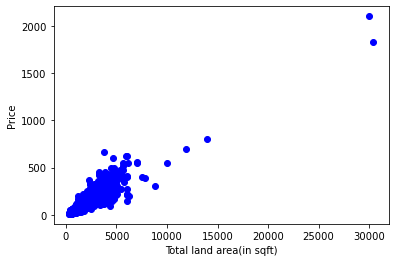

In [50]:
plt.scatter(df8.total_sqft, df8.price, color='blue')
plt.xlabel("Total land area(in sqft)")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

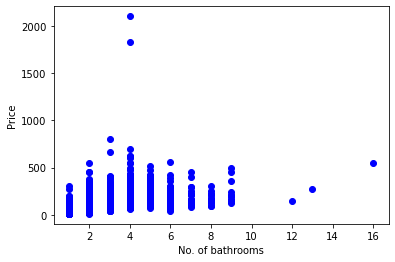

In [51]:
plt.scatter(df8.bath, df8.price, color='blue')
plt.xlabel("No. of bathrooms")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

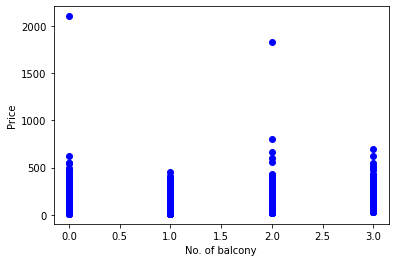

In [52]:
plt.scatter(df8.balcony, df8.price, color='blue')
plt.xlabel("No. of balcony")
plt.ylabel("Price")

## Encoding categorical data

In [53]:
dummies = pd.get_dummies(df8.site_location)
dummies.head(20)

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df9 = pd.concat([df8,dummies],axis='columns')
df9.head()

,total_sqft,bath,balcony,price,site_location,Bedrooms,price_per_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,1.0,39.07,Alandi Road,2,3699.810606,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,1.0,245.00,Alandi Road,4,8465.791292,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2.0,50.00,Alandi Road,2,4612.546125,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2.0,80.00,Alandi Road,2,6504.065041,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,2.0,130.00,Alandi Road,3,7428.571429,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df10 = df9.drop('site_location',axis='columns')
df10.head(10)

,total_sqft,bath,balcony,price,Bedrooms,price_per_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,1.0,39.07,2,3699.810606,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,1.0,245.00,4,8465.791292,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2.0,50.00,2,4612.546125,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2.0,80.00,2,6504.065041,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,2.0,130.00,3,7428.571429,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,995.0,2.0,1.0,41.00,2,4120.603015,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1360.0,2.0,1.0,95.00,2,6985.294118,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1040.0,2.0,2.0,50.00,2,4807.692308,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1655.0,3.0,2.0,86.06,3,5200.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,2790.0,5.0,3.0,198.00,4,7096.774194,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Defining the variables

In [56]:
df10.shape

(7395, 102)

In [57]:
X = df10.drop('price', axis=1)
X.head(5)

,total_sqft,bath,balcony,Bedrooms,price_per_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,1.0,2,3699.810606,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,1.0,4,8465.791292,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2.0,2,4612.546125,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2.0,2,6504.065041,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,2.0,3,7428.571429,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y = df10.price
y.head(5)

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

## Splitting dataset into training set and testing set

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [60]:
# let's see the shape of each dataset

print(X.shape)
print(y.shape)
print()
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(7395, 101)
(7395,)

(5176, 101)
(5176,)

(2219, 101)
(2219,)


# Fitting the Model

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [62]:
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
lr.intercept_

-3869130583.5883265

In [64]:
lr.coef_

array([ 6.66307678e-02,  6.66270653e-01, -1.98443240e-01, -4.80328908e+00,
        1.64404099e-02,  3.86913049e+09,  3.86913049e+09,  3.86913049e+09,
        3.86913049e+09,  3.86913048e+09,  3.86913049e+09,  3.86913049e+09,
        3.86913049e+09,  3.86913049e+09,  3.86913049e+09,  3.86913049e+09,
        3.86913049e+09,  3.86913049e+09,  3.86913049e+09,  3.86913049e+09,
        3.86913049e+09,  3.86913049e+09,  3.86913049e+09,  3.86913049e+09,
        3.86913049e+09,  3.86913049e+09,  3.86913049e+09,  3.86913049e+09,
        3.86913049e+09,  3.86913049e+09,  3.86913049e+09,  3.86913049e+09,
        3.86913049e+09,  3.86913049e+09,  3.86913049e+09,  3.86913050e+09,
        3.86913049e+09,  3.86913049e+09,  3.86913049e+09,  3.86913049e+09,
        3.86913049e+09,  3.86913049e+09,  3.86913049e+09,  3.86913049e+09,
        3.86913049e+09,  3.86913049e+09,  3.86913049e+09,  3.86913049e+09,
        3.86913049e+09,  3.86913049e+09,  3.86913049e+09,  3.86913049e+09,
        3.86913049e+09,  

### Model Evaluation

In [65]:
y_pred = lr.predict(X_train)

In [66]:
from sklearn import metrics

print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9560874168247991
Adjusted R^2: 0.9552133192882017
MAE: 7.679657995929305
MSE: 214.2044935335795
RMSE: 14.635726614472528


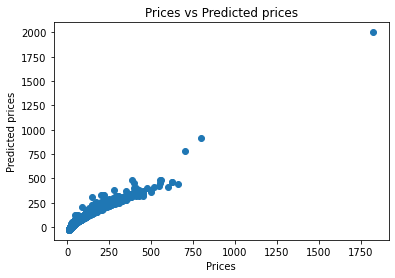

In [67]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

##### For Test Data

In [68]:
y_test_pred = lr.predict(X_test)

In [69]:
print('R^2:', metrics.r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9717638337300896
Adjusted R^2: 0.9704167138466409
MAE: 7.312661909599356
MSE: 155.72466971655135
RMSE: 12.47896909670632


In [70]:
lr.score(X_test, y_test)

0.9717638337300896

### K-fold cross validation

In [71]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.96060283, 0.96240938, 0.94840612, 0.95260645, 0.95583506])

### Dumping the model for later use

In [72]:
import pickle

In [73]:
pickle.dump(lr,open("predictor.pkl",'wb'))

In [74]:
pickled_model = pickle.load(open('predictor.pkl','rb'))

In [75]:
pickled_model.predict(X_test)

array([ 60.43323612,  97.4280901 , 121.97407007, ...,  33.88966179,
        93.54690456,  49.41309452])

## Predicting some prices

In [80]:
def predict_price(location,sqft,bath,bhk,balcony):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index] = 1

    return pickled_model.predict([x])[0]

In [84]:
predict_price('Alandi Road',1056,2,2,1)

C:\Users\Image\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-24.265953063964844